In [2]:
import numpy as np
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import dlib
from matplotlib import pyplot as plt

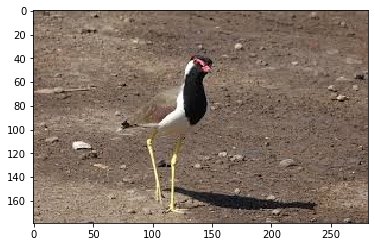

In [28]:
img = cv2.imread('bird3.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [29]:
mask = np.zeros(img.shape[:2], np.uint8) 
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [30]:
img.shape[:2]

(179, 282)

In [31]:
# use only for fixed size bounding box 
h = img.shape[0] + 30
w = img.shape[1] + 30

In [57]:
rect = (10,10, 190, 186)
#84, 38, 160, 166
rect

(10, 10, 190, 186)

In [58]:
mask, bgdModel, fgdModel = cv2.grabCut(img, mask,rect, bgdModel,fgdModel,6,cv2.GC_INIT_WITH_RECT)

In [59]:
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

In [60]:
# adding additional dimension for rgb to the mask, by default it gets # multiply it with input image to get the segmented image
img_cut=img*mask2[:,:,np.newaxis]
img_cut

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [61]:
#draw the bounding box on input image input_image_with_bb

final_image = cv2.resize(img_cut, (448,448))


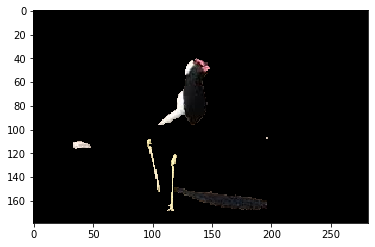

In [62]:
plt.imshow(img_cut)